In [117]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Install yfinance
!pip install yfinance

In [119]:
import yfinance as yf
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [120]:
ticker = "AAPL"  # Replace with the desired stock symbol
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")  # Specify the desired time range
price = np.array(data['Adj Close']).reshape(-1,1) # Extract the Adj Close

[*********************100%***********************]  1 of 1 completed


In [121]:
# Find the optimal k value using elbow method
k_vals = []
for k in range(1, 10):
    kmeans_n = KMeans(n_clusters=k)
    kmeans_n.fit(price)
    k_vals.append(kmeans_n.inertia_)

<Axes: >

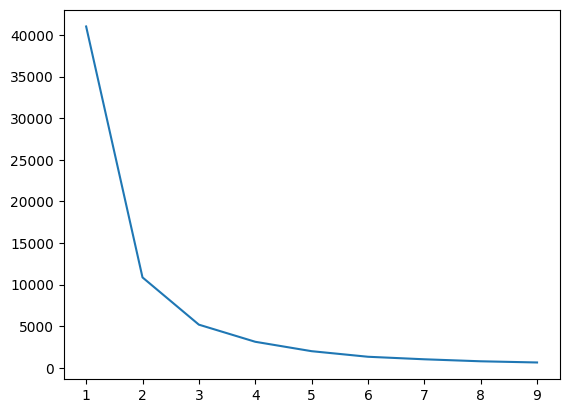

In [122]:
# The result suggests that we should you k value of 3
sns.lineplot(x=range(1, 10), y=k_vals)

In [123]:
K = 3
kmeans = KMeans(n_clusters=K).fit(price)

In [124]:
# Create a dataframe for ploting later
plot_data = data['Adj Close'].to_frame()
plot_data['cluster'] = kmeans.predict(price)

<Axes: xlabel='Date', ylabel='Adj Close'>

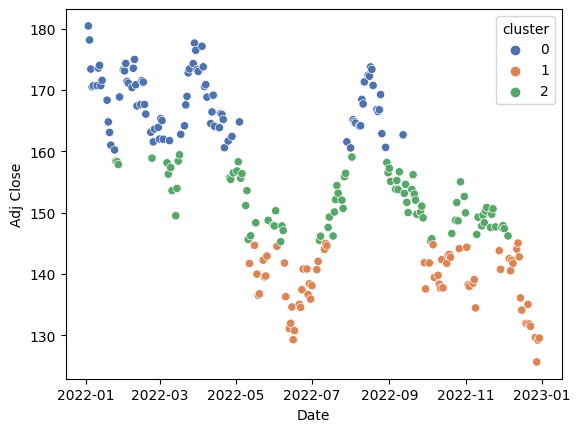

In [125]:
# Let's see how our clusters are divided
sns.scatterplot(plot_data, x='Date', y='Adj Close', hue='cluster', palette="deep")

In [126]:
# Get min and max values of each cluster
min_max_clusters = np.sort(plot_data.groupby('cluster').agg({'Adj Close':['min', 'max']}).values, axis=0)

In [127]:
# Merge the gap between each cluster using the average of maximum value and the minium of the consecutive cluster 
for i in range(K - 1):
  avg = (min_max_clusters[i][1] + min_max_clusters[i+1][0])/2
  min_max_clusters[i][1] = min_max_clusters[i+1][0] = avg


In [128]:
# Because lines at the minimum and maximum value do not give us any important information, we will drop those values and duplicate values.
min_max_clusters = set(min_max_clusters.flatten()[1:-1])

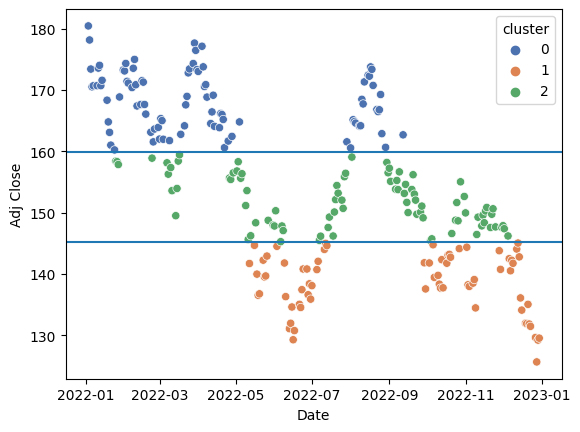

In [129]:
sns.scatterplot(plot_data, x='Date', y='Adj Close', hue='cluster', palette="deep")
for value in min_max_clusters:
  plt.axhline(y=value)